<a href="https://colab.research.google.com/github/shreya27singh/H1N1_vaccination/blob/main/Prediction_model_for_H1N1_vaccination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Prediction model for h1n1 dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#Data processing functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")
import os
os.chdir(r'D:\Datasets\Datasets-main')

In [ ]:
df = pd.read_csv("h1n1_vaccine_prediction.csv")

In [ ]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [ ]:
df.shape

(26707, 34)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [ ]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [ ]:
stat=""
for c in df.columns:
    stat += c
    stat += "="
    stat += str(df[c].unique())
    stat += "//////////"
stat

"unique_id=[    0     1     2 ... 26704 26705 26706]//////////h1n1_worry=[ 1.  3.  2.  0. nan]//////////h1n1_awareness=[ 0.  2.  1. nan]//////////antiviral_medication=[ 0.  1. nan]//////////contact_avoidance=[ 0.  1. nan]//////////bought_face_mask=[ 0.  1. nan]//////////wash_hands_frequently=[ 0.  1. nan]//////////avoid_large_gatherings=[ 0.  1. nan]//////////reduced_outside_home_cont=[ 1.  0. nan]//////////avoid_touch_face=[ 1.  0. nan]//////////dr_recc_h1n1_vacc=[ 0. nan  1.]//////////dr_recc_seasonal_vacc=[ 0. nan  1.]//////////chronic_medic_condition=[ 0.  1. nan]//////////cont_child_undr_6_mnths=[ 0.  1. nan]//////////is_health_worker=[ 0.  1. nan]//////////has_health_insur=[ 1. nan  0.]//////////is_h1n1_vacc_effective=[ 3.  5.  4.  2.  1. nan]//////////is_h1n1_risky=[ 1.  4.  3.  2.  5. nan]//////////sick_from_h1n1_vacc=[ 2.  4.  1.  5.  3. nan]//////////is_seas_vacc_effective=[ 2.  4.  5.  3.  1. nan]//////////is_seas_risky=[ 1.  2.  4.  3.  5. nan]//////////sick_from_seas_vacc=

##### Removing unique_id because it is irrelevant with the model and the ones with large number of null values

In [ ]:
df.drop("unique_id",axis=1,inplace=True)

In [ ]:
val = df.shape[0]*20//100
val

5341

##### Taking 20% as a safe mark for null values Columns with more than 5341 null values will be dropped

In [ ]:
df.drop("has_health_insur",axis=1,inplace=True)

In [ ]:
df.shape

(26707, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26615 non-null  float64
 1   h1n1_awareness             26591 non-null  float64
 2   antiviral_medication       26636 non-null  float64
 3   contact_avoidance          26499 non-null  float64
 4   bought_face_mask           26688 non-null  float64
 5   wash_hands_frequently      26665 non-null  float64
 6   avoid_large_gatherings     26620 non-null  float64
 7   reduced_outside_home_cont  26625 non-null  float64
 8   avoid_touch_face           26579 non-null  float64
 9   dr_recc_h1n1_vacc          24547 non-null  float64
 10  dr_recc_seasonal_vacc      24547 non-null  float64
 11  chronic_medic_condition    25736 non-null  float64
 12  cont_child_undr_6_mnths    25887 non-null  float64
 13  is_health_worker           25903 non-null  flo

##### We will divide this into two datasets df2, df3 where one will have all null value rows removed and other will have their null values replaced by median in float type and mode in object type

In [ ]:
# df2=>null values removed
df2 = df.copy()

In [ ]:
df2.dropna(inplace=True)

In [ ]:
df2.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: i

In [ ]:
#df3=>null replaced by median and mode
df3 = df.copy()

#object values replaced by mode
for i in range(20,29):
    df3[df3.columns[i]].replace(np.nan,df3[df3.columns[i]].mode()[0],inplace=True)

#numerical values replaced by median
for i in range (0,20):
    df3[df3.columns[i]].replace(np.nan,df3[df3.columns[i]].median(),inplace=True)
df3[df3.columns[29]].replace(np.nan,df3[df3.columns[29]].median(),inplace=True)
df3[df3.columns[30]].replace(np.nan,df3[df3.columns[30]].median(),inplace=True)

In [ ]:
df3.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: i

##### Transforming object values to numerical values

In [ ]:
for i in range(20,29):
    df2[df2.columns[i]] = le.fit_transform(df2[df2.columns[i]])
for i in range(20,29):
    df3[df3.columns[i]] = le.fit_transform(df3[df3.columns[i]])

In [ ]:
df2.dtypes

h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                    int32
qualification                  int32
race                           int32
sex                            int32
income_level                   int32
marital_status                 int32
housing_status                 int32
e

In [ ]:
df3.dtypes

h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                    int32
qualification                  int32
race                           int32
sex                            int32
income_level                   int32
marital_status                 int32
housing_status                 int32
e

In [ ]:
corr1 = df2.corr()
corr1

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
h1n1_worry,1.000000,0.059023,0.090782,0.235204,0.162740,0.293807,0.264525,0.252513,0.249776,0.157154,...,-0.138008,-0.140634,0.051541,-0.037674,0.001543,0.063658,0.001952,-0.016045,0.048792,0.134136
h1n1_awareness,0.059023,1.000000,-0.007402,0.071382,0.037583,0.084454,-0.044571,-0.069281,0.085656,0.090628,...,0.159728,-0.090490,-0.048729,-0.119238,-0.129561,-0.130574,-0.059204,0.012606,0.053608,0.125878
antiviral_medication,0.090782,-0.007402,1.000000,0.045012,0.145122,0.059663,0.106117,0.124120,0.064138,0.057030,...,-0.119113,-0.012273,0.073540,0.019969,0.072057,0.009879,0.016787,0.041534,0.080335,0.036202
contact_avoidance,0.235204,0.071382,0.045012,1.000000,0.061104,0.336035,0.227655,0.223418,0.328064,0.065566,...,-0.003287,-0.124459,0.005424,-0.056189,-0.033846,0.026455,-0.023196,0.013944,0.039898,0.044053
bought_face_mask,0.162740,0.037583,0.145122,0.061104,1.000000,0.077821,0.181502,0.167205,0.107283,0.091775,...,-0.088761,-0.048235,0.049560,0.005343,0.053974,0.036373,-0.004213,0.016216,0.005850,0.075303
wash_hands_frequently,0.293807,0.084454,0.059663,0.336035,0.077821,1.000000,0.193549,0.191407,0.365312,0.087836,...,-0.067637,-0.168138,0.019699,-0.048730,-0.022973,0.003264,-0.011314,0.006272,0.041377,0.075384
avoid_large_gatherings,0.264525,-0.044571,0.106117,0.227655,0.181502,0.193549,1.000000,0.587728,0.244823,0.084759,...,-0.122248,-0.056706,0.023563,0.025693,0.055086,0.145750,0.047392,-0.032031,-0.010426,0.020589
reduced_outside_home_cont,0.252513,-0.069281,0.124120,0.223418,0.167205,0.191407,0.587728,1.000000,0.262231,0.070379,...,-0.139519,-0.044241,0.049328,0.029166,0.072339,0.156708,0.033533,-0.027936,-0.010334,0.017272
avoid_touch_face,0.249776,0.085656,0.064138,0.328064,0.107283,0.365312,0.244823,0.262231,1.000000,0.088636,...,-0.059859,-0.178853,-0.001153,-0.038495,-0.021259,0.028547,0.008451,-0.002907,0.020962,0.071344
dr_recc_h1n1_vacc,0.157154,0.090628,0.057030,0.065566,0.091775,0.087836,0.084759,0.070379,0.088636,1.000000,...,-0.018952,-0.048523,0.023225,-0.021643,0.000117,0.022387,-0.000143,0.001079,0.024370,0.396932


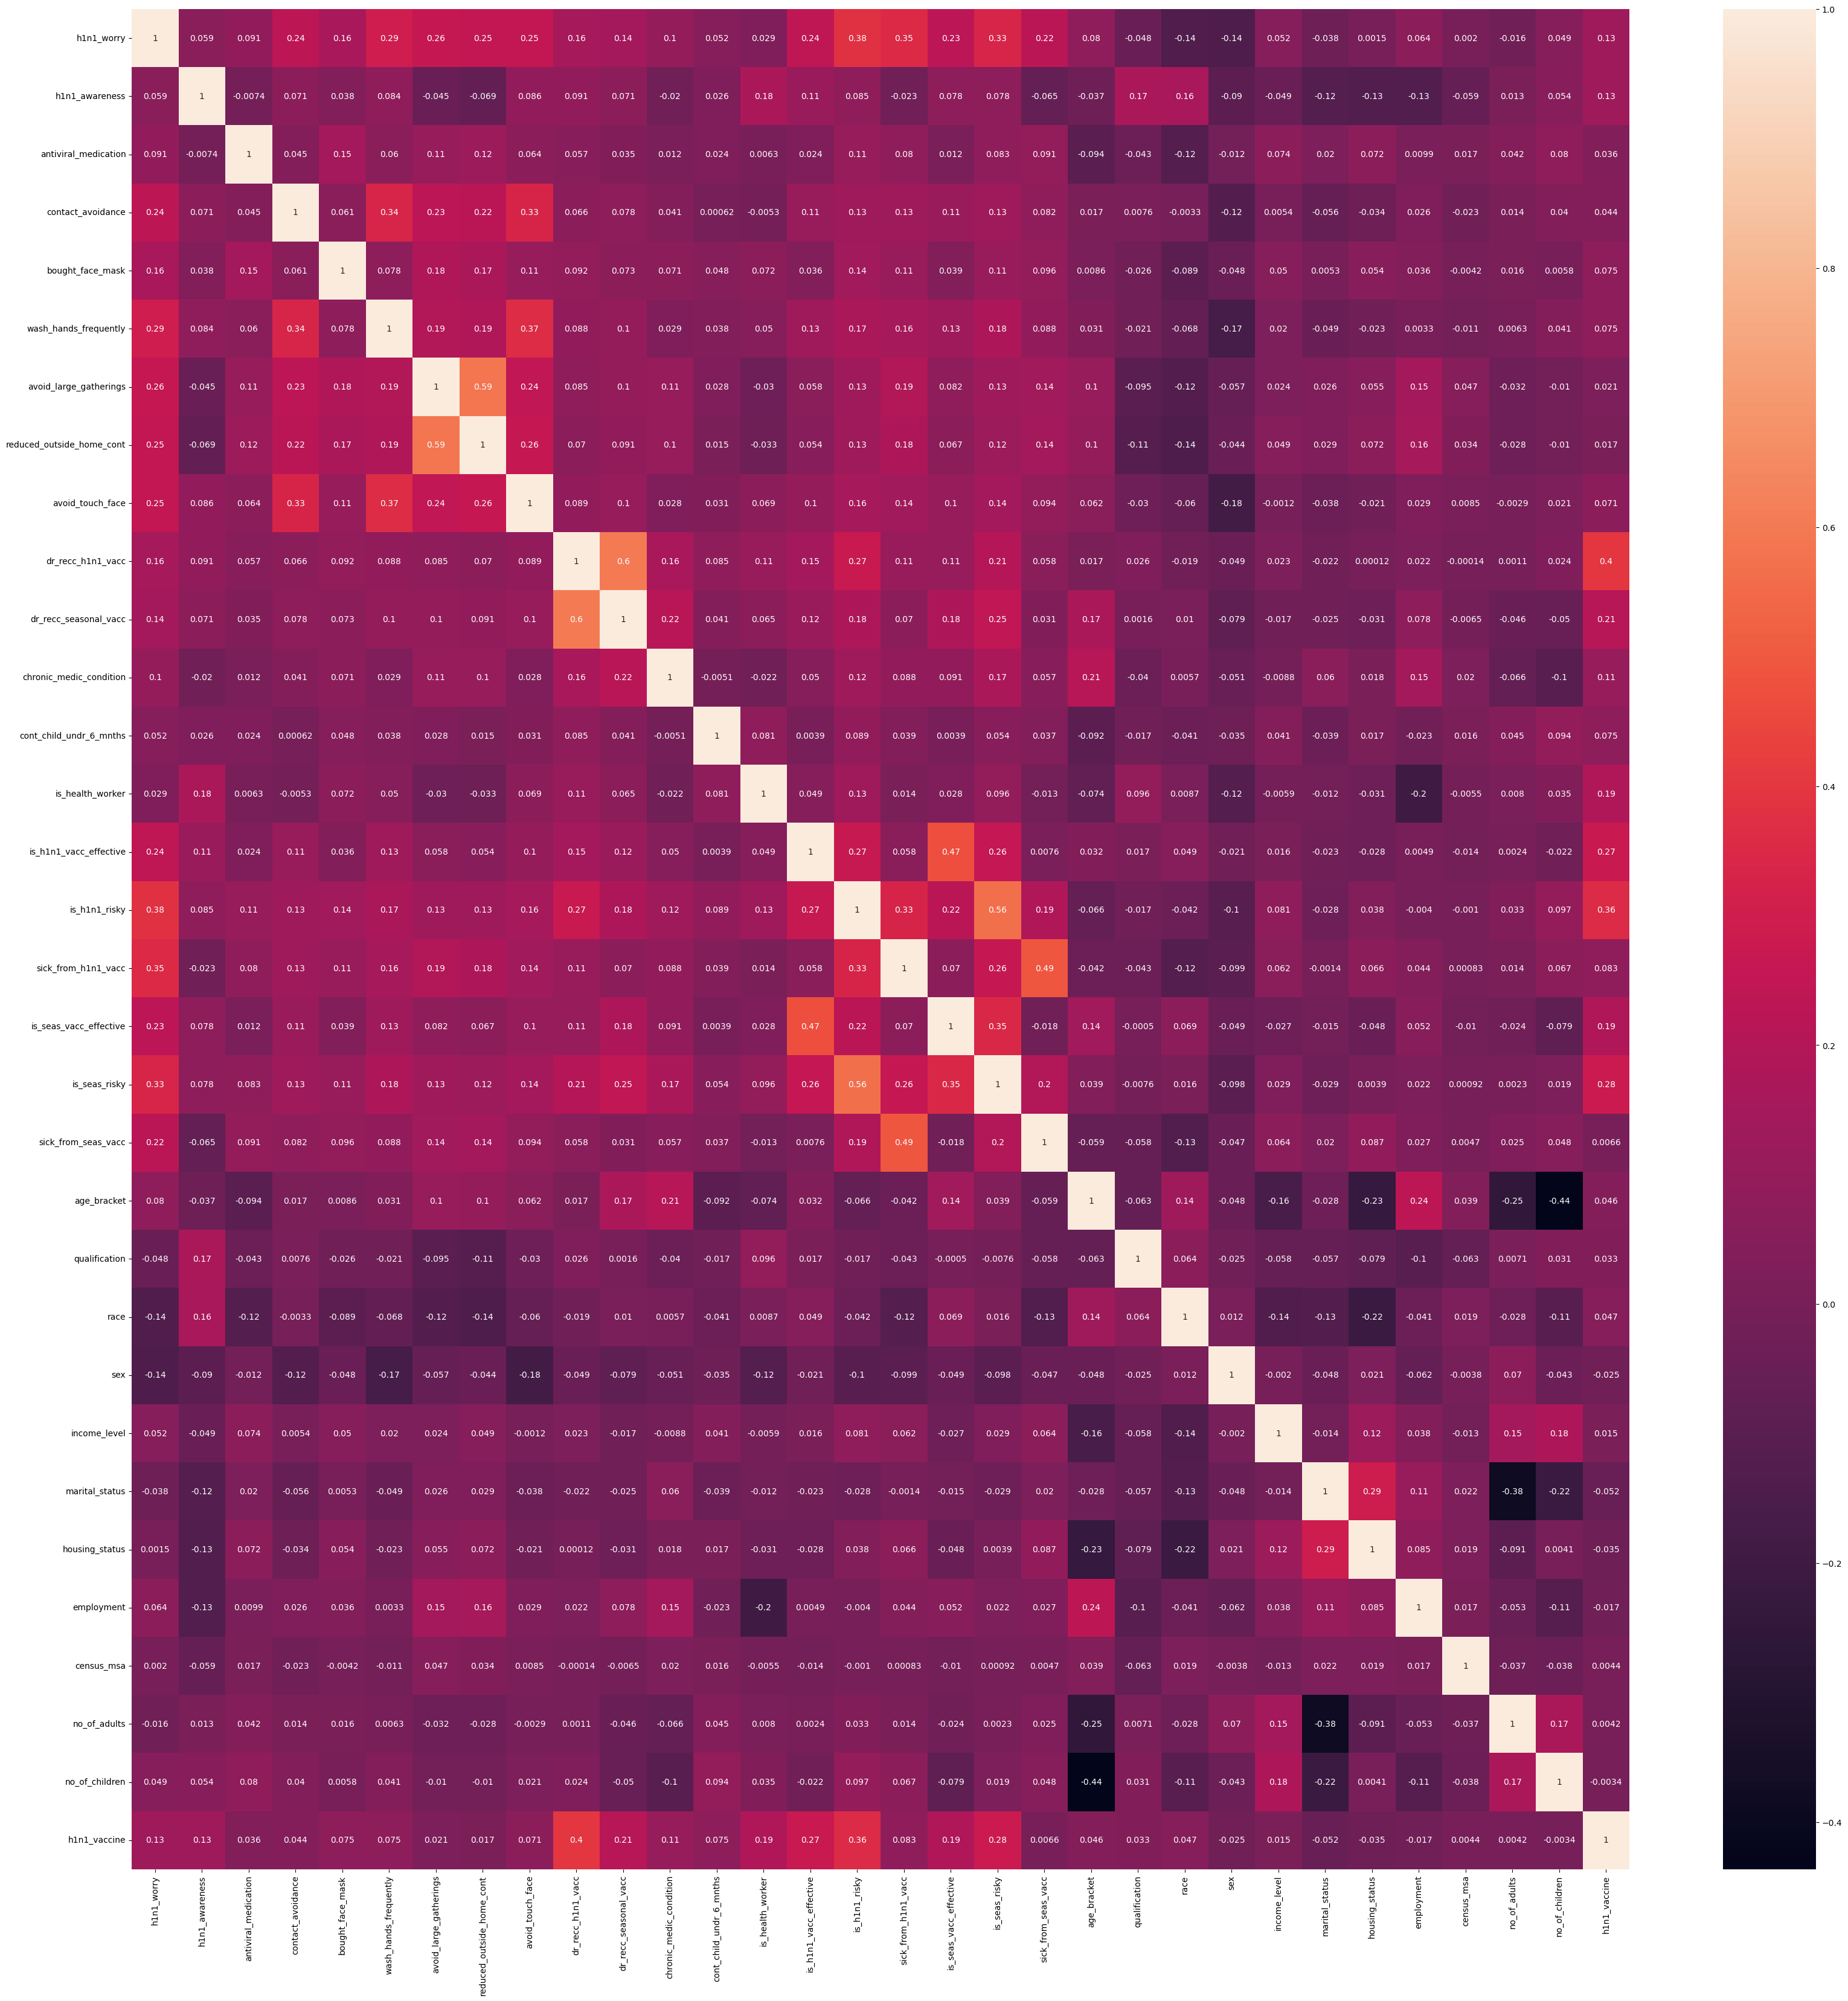

In [ ]:
plt.figure(figsize=(40,40))
sns.heatmap(corr1,annot=True)
plt.show()

In [ ]:
corr2 = df3.corr()
corr2

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
h1n1_worry,1.000000,0.060828,0.089866,0.229648,0.155757,0.291670,0.254133,0.245404,0.245038,0.136957,...,-0.130248,-0.127503,0.046844,-0.028045,0.000714,0.055753,0.004215,-0.016079,0.049441,0.121574
h1n1_awareness,0.060828,1.000000,-0.010450,0.087194,0.029888,0.089690,-0.047293,-0.066479,0.084633,0.094135,...,0.150439,-0.067567,-0.018002,-0.108783,-0.108313,-0.118124,-0.060630,0.023866,0.053378,0.117771
antiviral_medication,0.089866,-0.010450,1.000000,0.048533,0.145772,0.063996,0.106314,0.127204,0.069982,0.050882,...,-0.110963,-0.006196,0.061054,0.005924,0.056575,0.000885,0.012176,0.044829,0.083090,0.040226
contact_avoidance,0.229648,0.087194,0.048533,1.000000,0.064155,0.334974,0.225402,0.217599,0.329796,0.065589,...,0.001699,-0.112591,0.016870,-0.045367,-0.028909,0.022550,-0.032665,0.017995,0.038977,0.046837
bought_face_mask,0.155757,0.029888,0.145772,0.064155,1.000000,0.083229,0.180377,0.162964,0.103603,0.079887,...,-0.083075,-0.049912,0.038494,0.001622,0.043492,0.027248,-0.003851,0.014191,0.004794,0.070413
wash_hands_frequently,0.291670,0.089690,0.063996,0.334974,0.083229,1.000000,0.194750,0.191804,0.362979,0.086392,...,-0.065468,-0.157033,0.023675,-0.041226,-0.017509,0.001039,-0.016584,0.009367,0.047451,0.074570
avoid_large_gatherings,0.254133,-0.047293,0.106314,0.225402,0.180377,0.194750,1.000000,0.580881,0.251383,0.077143,...,-0.108378,-0.055871,0.015420,0.025476,0.047477,0.132775,0.037169,-0.030994,-0.009126,0.018089
reduced_outside_home_cont,0.245404,-0.066479,0.127204,0.217599,0.162964,0.191804,0.580881,1.000000,0.265401,0.067136,...,-0.124640,-0.039100,0.034265,0.024708,0.063544,0.138451,0.028633,-0.026542,-0.008937,0.022080
avoid_touch_face,0.245038,0.084633,0.069982,0.329796,0.103603,0.362979,0.251383,0.265401,1.000000,0.087201,...,-0.056717,-0.162693,0.003681,-0.027781,-0.017302,0.029249,0.004741,-0.001233,0.023739,0.070855
dr_recc_h1n1_vacc,0.136957,0.094135,0.050882,0.065589,0.079887,0.086392,0.077143,0.067136,0.087201,1.000000,...,-0.014451,-0.041331,0.027327,-0.020290,0.001887,0.019265,-0.007640,0.009081,0.029398,0.394086


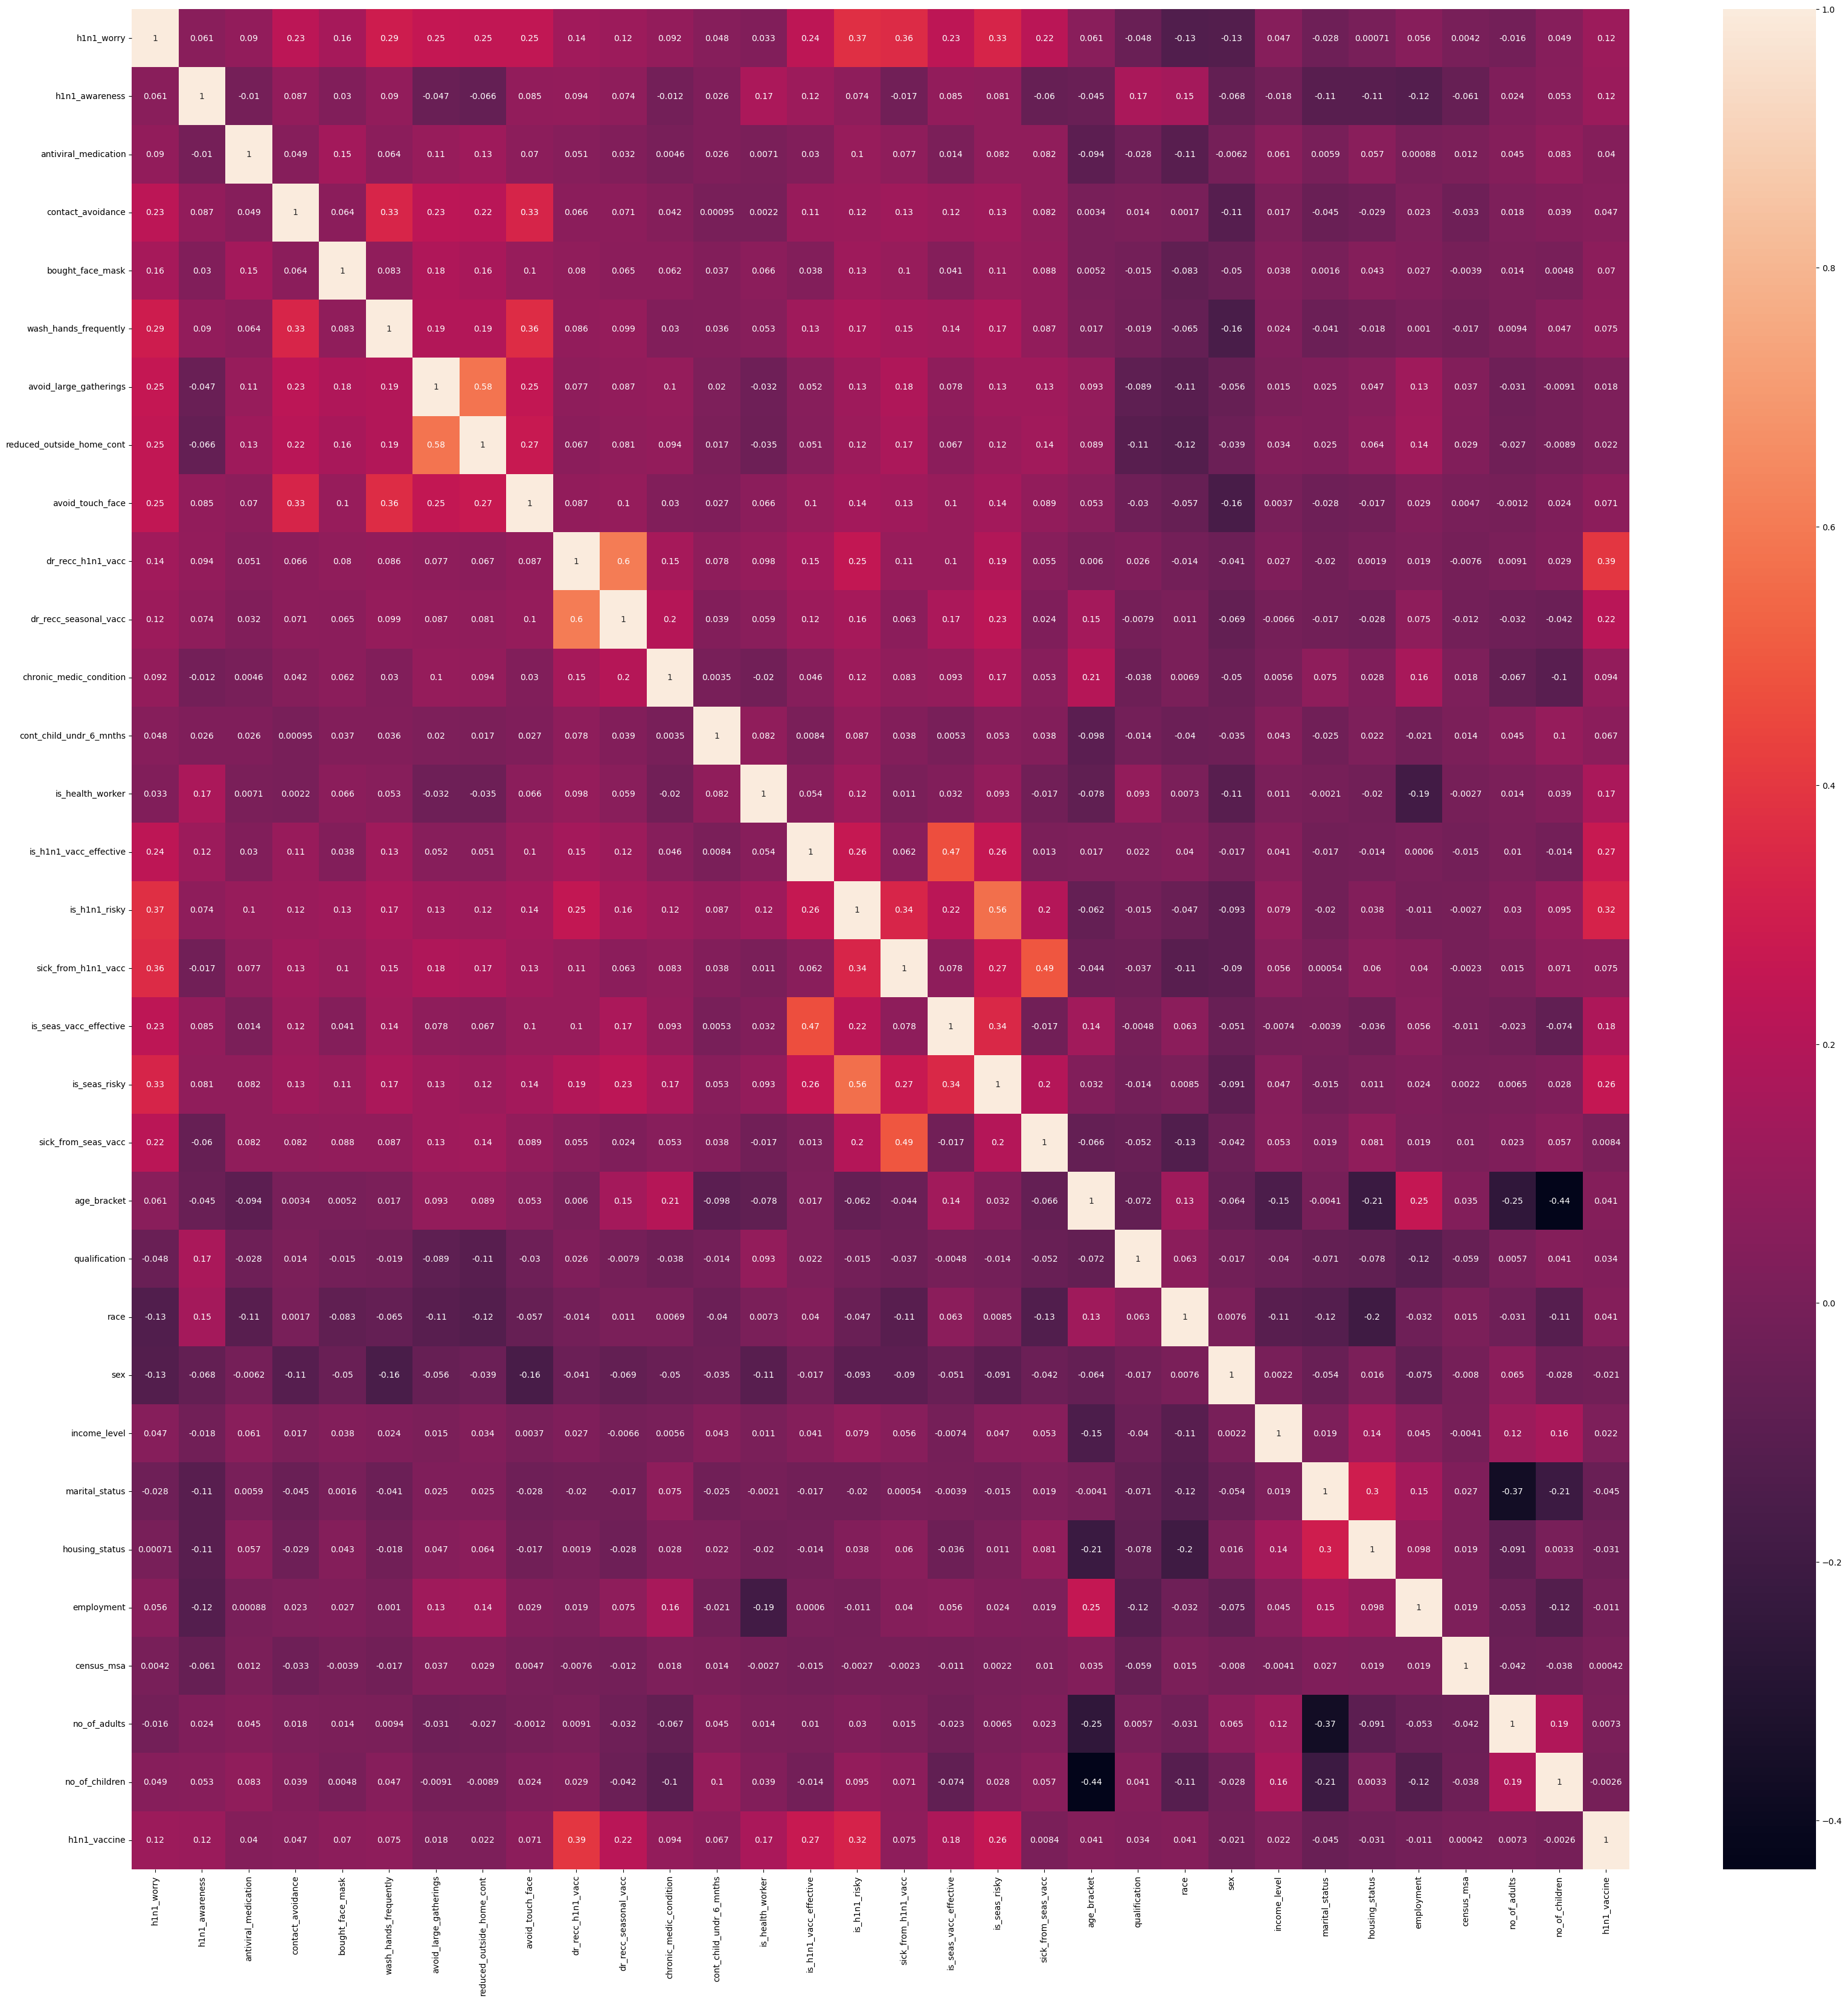

In [ ]:
plt.figure(figsize=(40,40))
sns.heatmap(corr2,annot=True)
plt.show()

##### Selecting columns with significant correlation values(>0.05)

In [ ]:
sdf2 = df2.copy()
sdf3 = df3.copy()

In [ ]:
cols = df2.columns
for i in range(len(cols)):
    if abs(corr1['h1n1_vaccine'][i]) < 0.05:
        df2.drop(cols[i],axis = 1,inplace = True)
len(df2.columns)

17

In [ ]:
sdf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 19642 non-null  float64
 1   h1n1_awareness             19642 non-null  float64
 2   antiviral_medication       19642 non-null  float64
 3   contact_avoidance          19642 non-null  float64
 4   bought_face_mask           19642 non-null  float64
 5   wash_hands_frequently      19642 non-null  float64
 6   avoid_large_gatherings     19642 non-null  float64
 7   reduced_outside_home_cont  19642 non-null  float64
 8   avoid_touch_face           19642 non-null  float64
 9   dr_recc_h1n1_vacc          19642 non-null  float64
 10  dr_recc_seasonal_vacc      19642 non-null  float64
 11  chronic_medic_condition    19642 non-null  float64
 12  cont_child_undr_6_mnths    19642 non-null  float64
 13  is_health_worker           19642 non-null  flo

In [ ]:
cols = df3.columns
for i in range(len(cols)):
    if abs(corr2['h1n1_vaccine'][i]) < 0.05:
        df3.drop(cols[i],axis = 1,inplace = True)
len(df3.columns)

16

In [ ]:
sdf3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26707 non-null  float64
 1   h1n1_awareness             26707 non-null  float64
 2   antiviral_medication       26707 non-null  float64
 3   contact_avoidance          26707 non-null  float64
 4   bought_face_mask           26707 non-null  float64
 5   wash_hands_frequently      26707 non-null  float64
 6   avoid_large_gatherings     26707 non-null  float64
 7   reduced_outside_home_cont  26707 non-null  float64
 8   avoid_touch_face           26707 non-null  float64
 9   dr_recc_h1n1_vacc          26707 non-null  float64
 10  dr_recc_seasonal_vacc      26707 non-null  float64
 11  chronic_medic_condition    26707 non-null  float64
 12  cont_child_undr_6_mnths    26707 non-null  float64
 13  is_health_worker           26707 non-null  flo

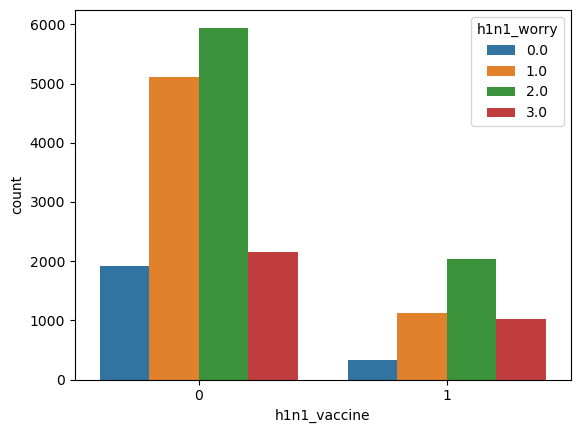

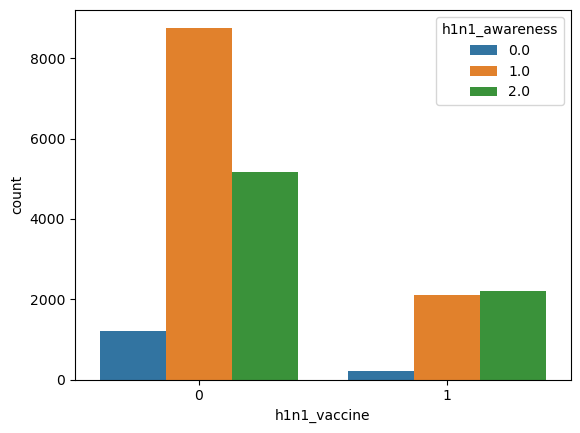

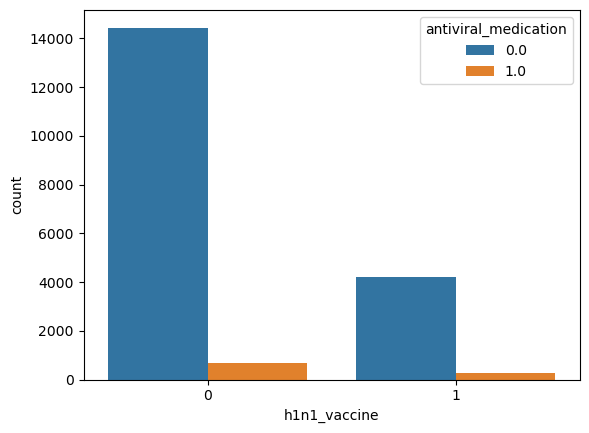

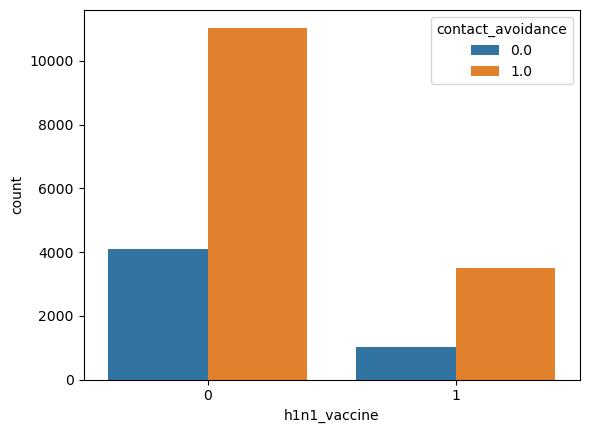

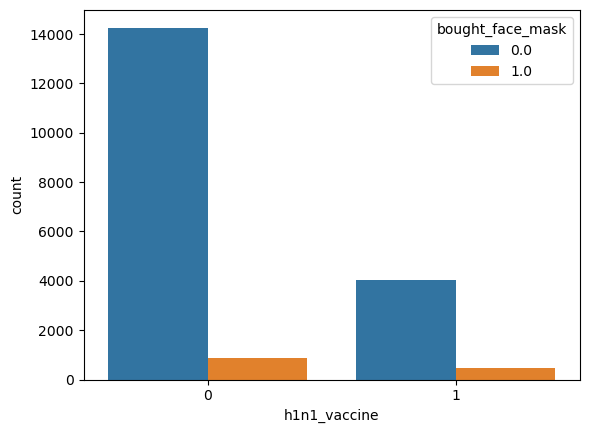

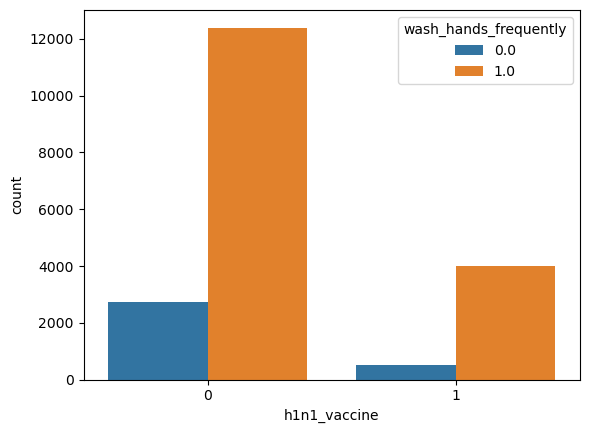

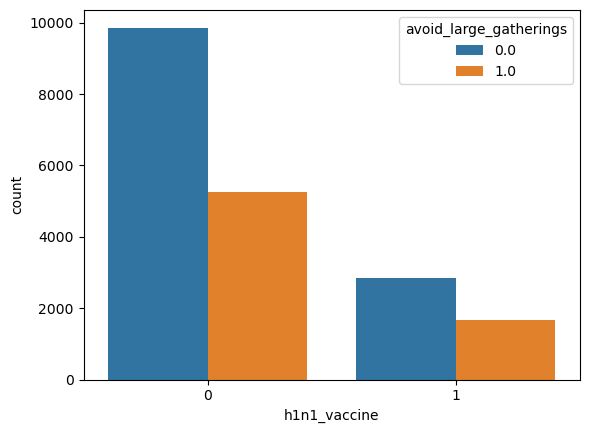

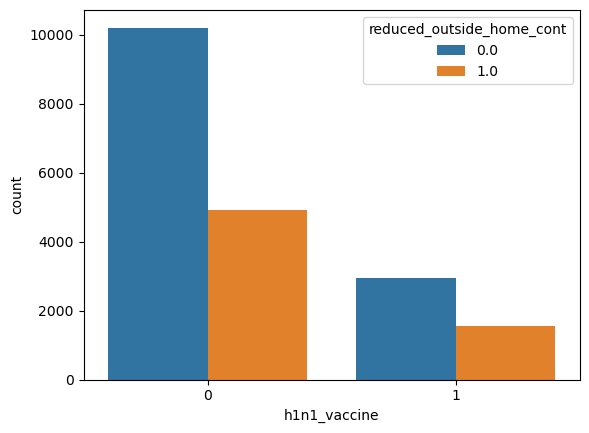

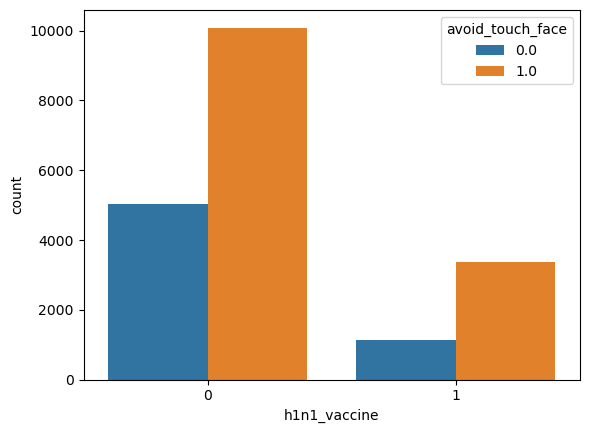

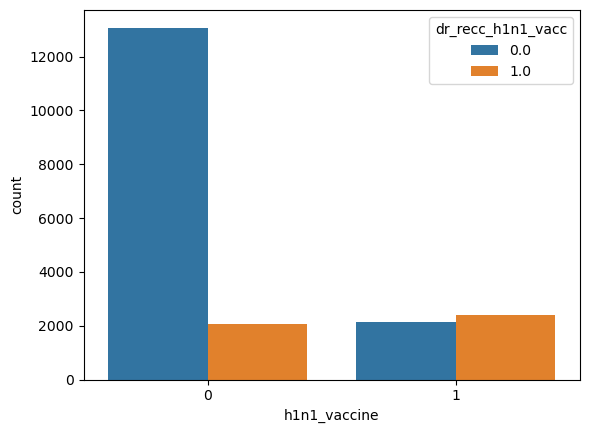

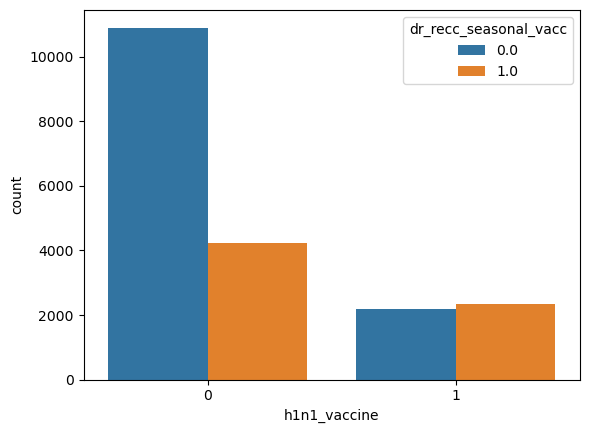

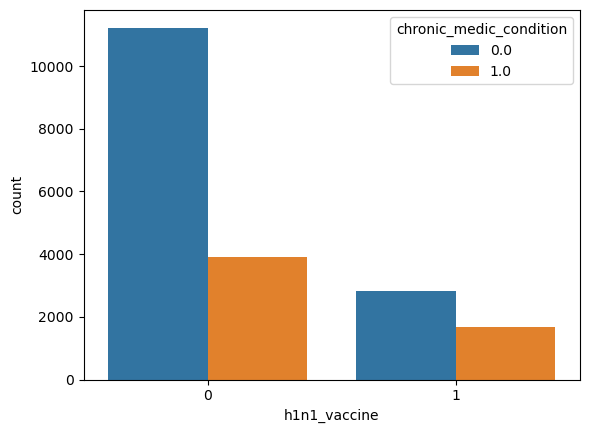

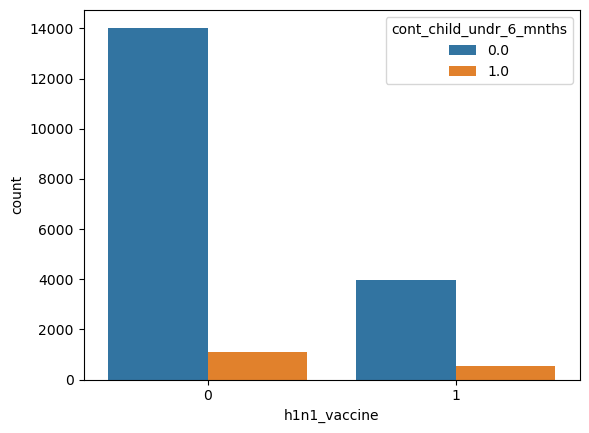

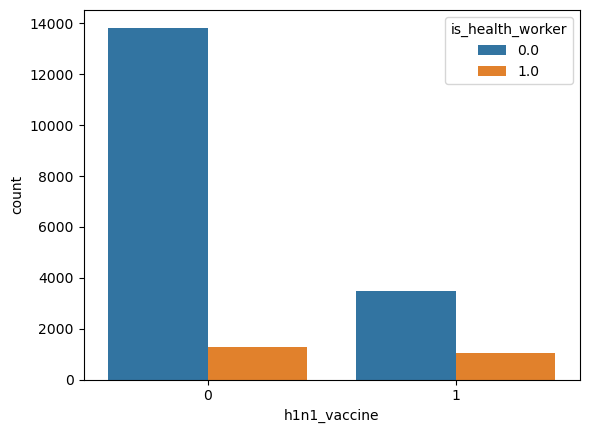

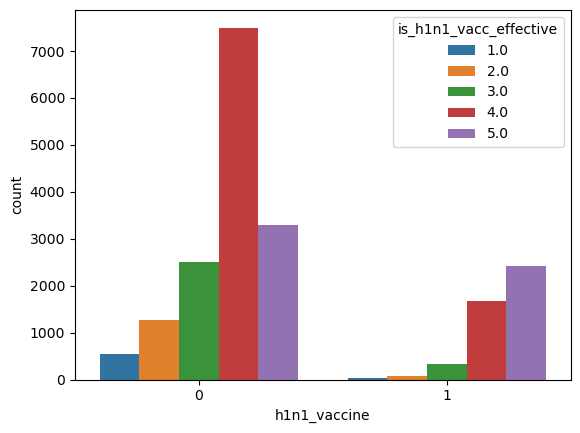

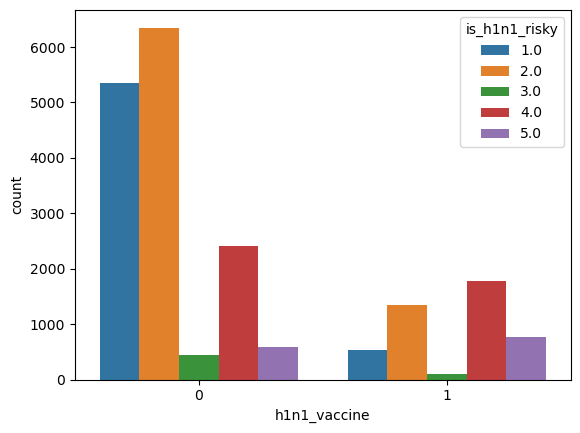

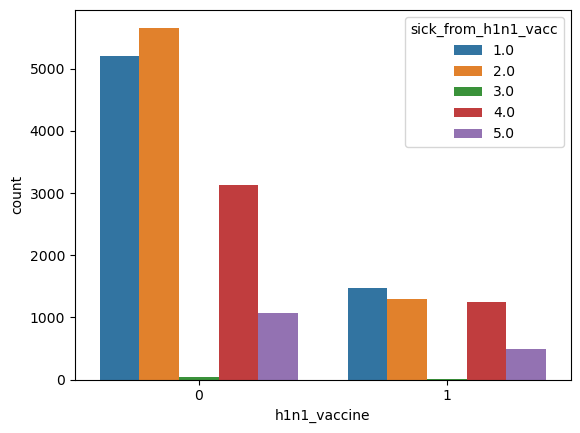

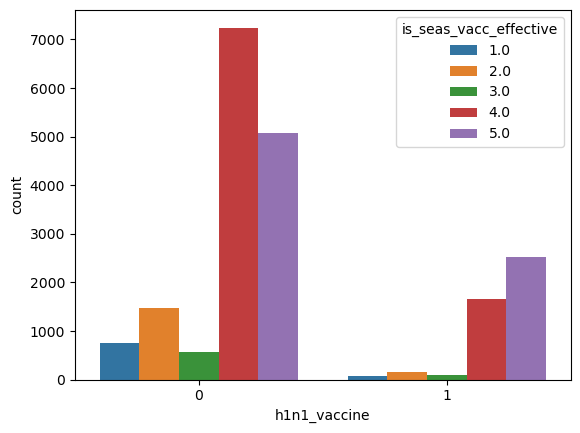

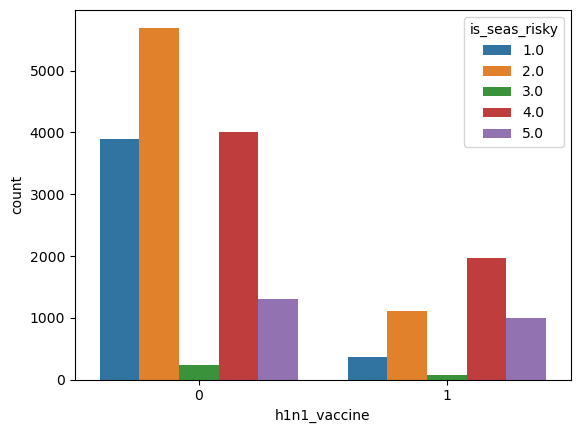

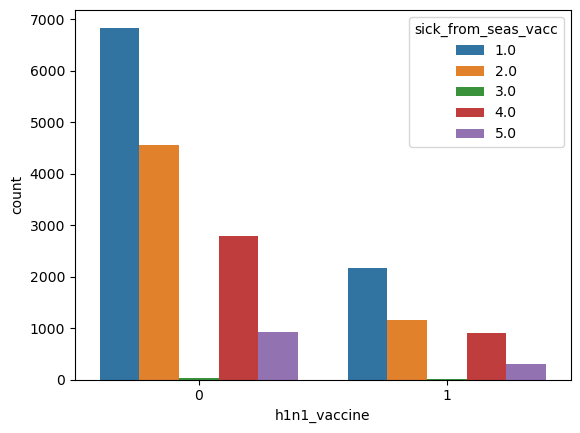

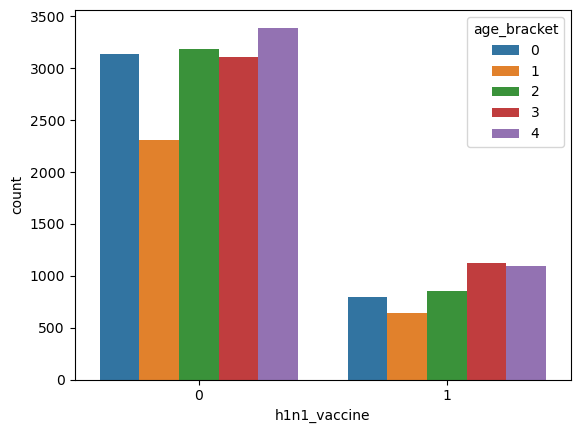

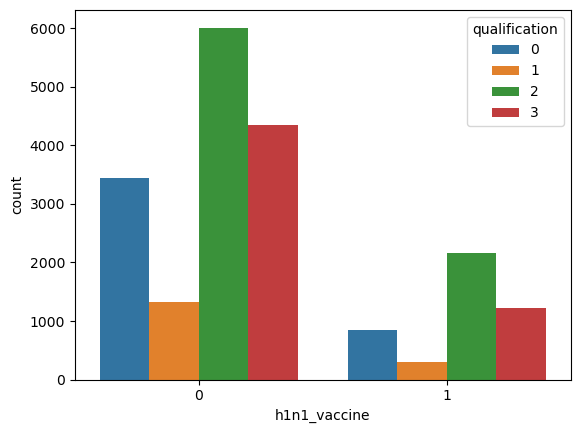

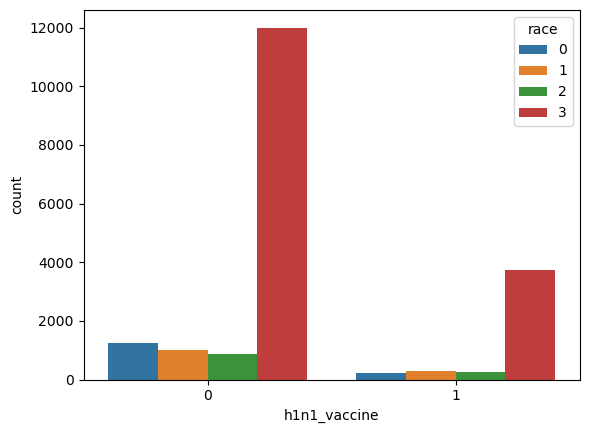

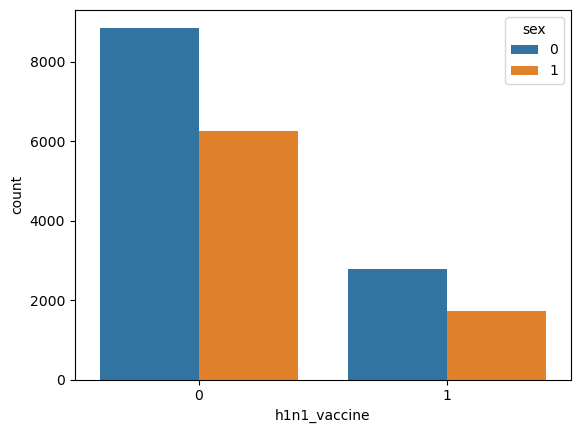

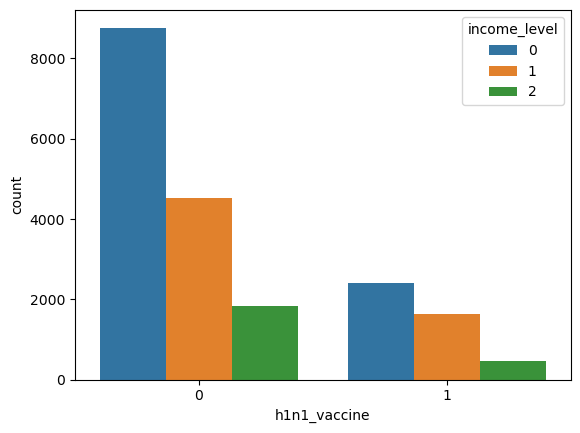

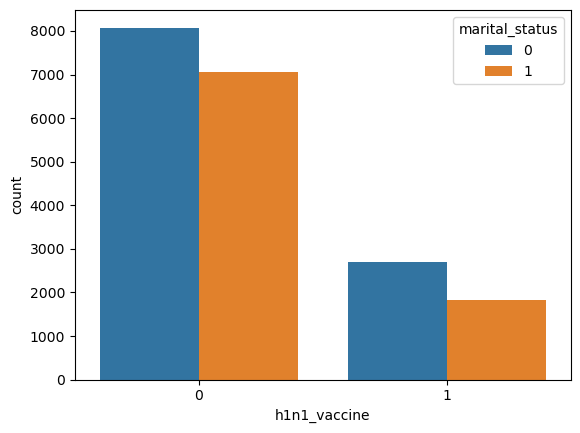

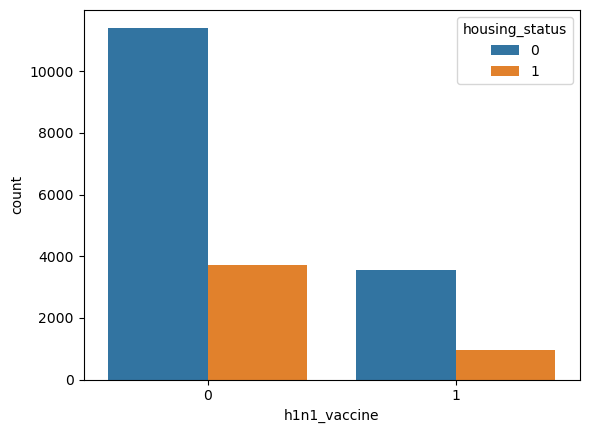

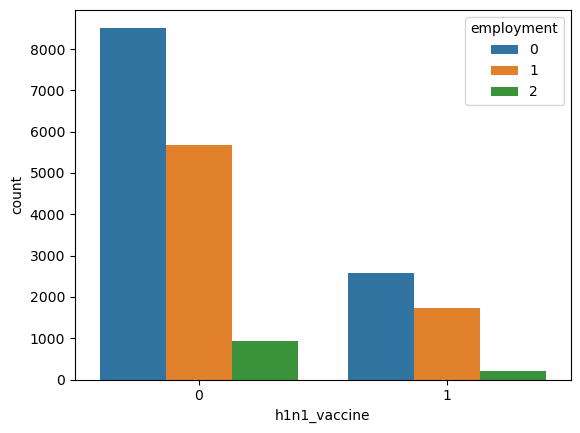

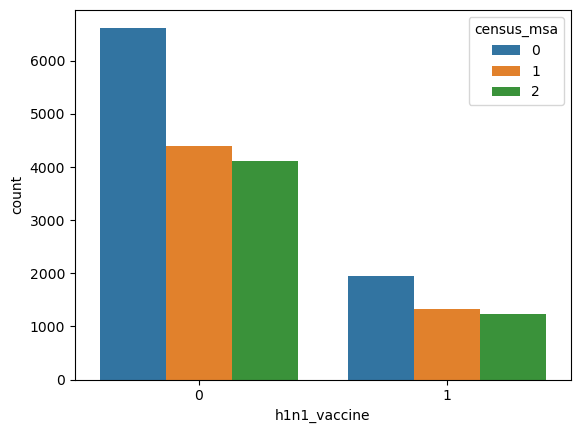

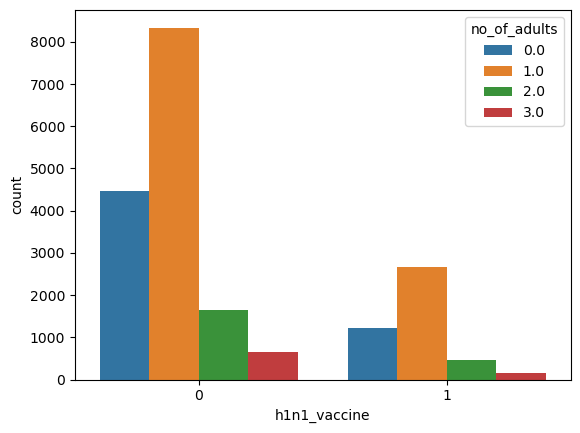

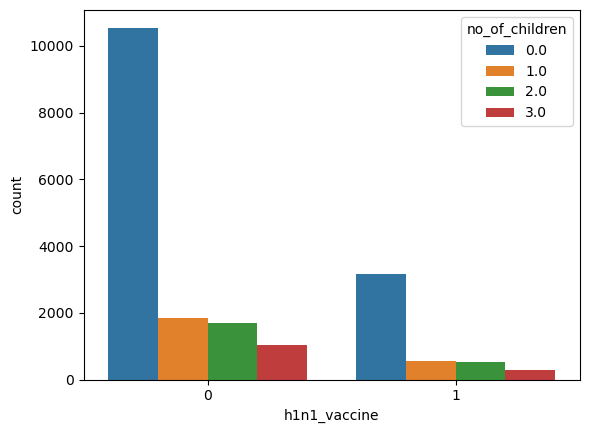

In [ ]:
cols = sdf2.columns
for i in cols[:-1]:
    sns.countplot(data = sdf2,x = cols[-1],hue = i)
    plt.show()

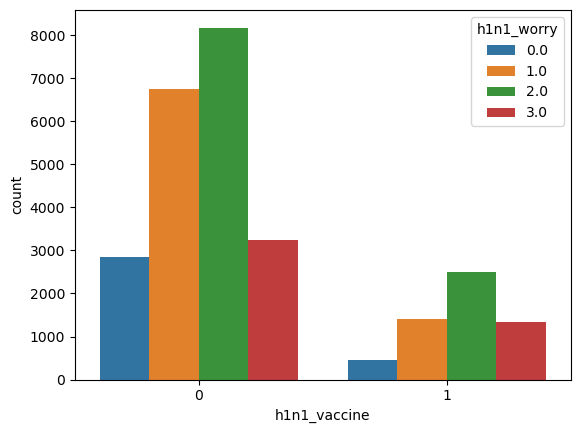

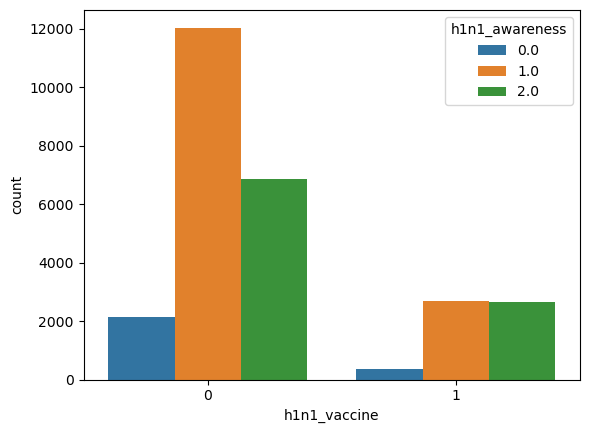

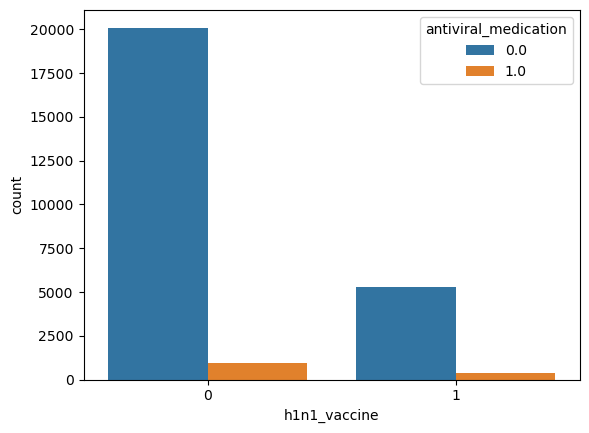

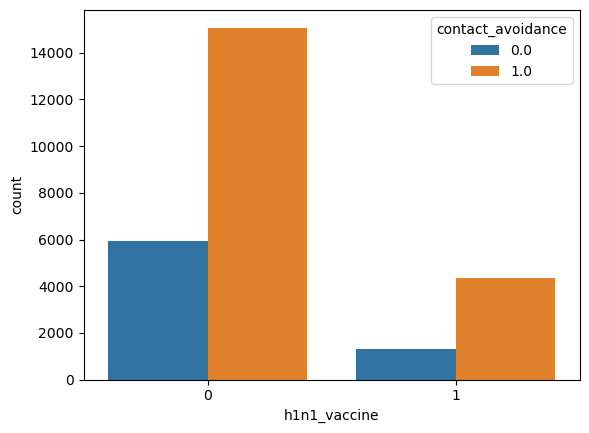

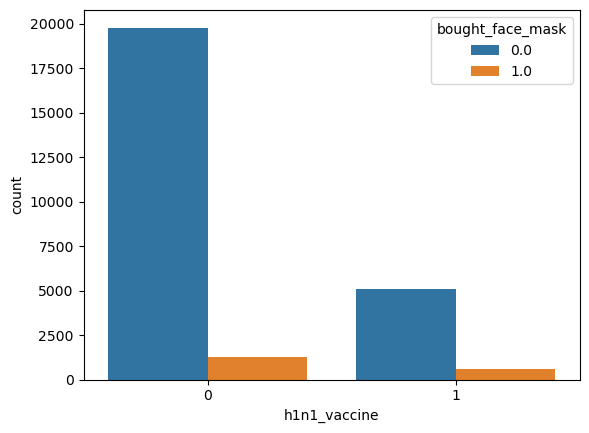

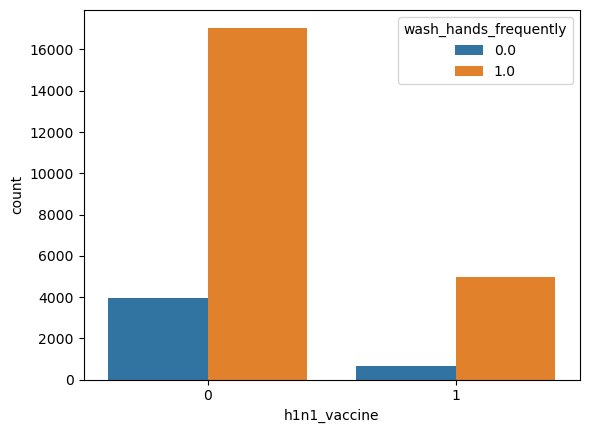

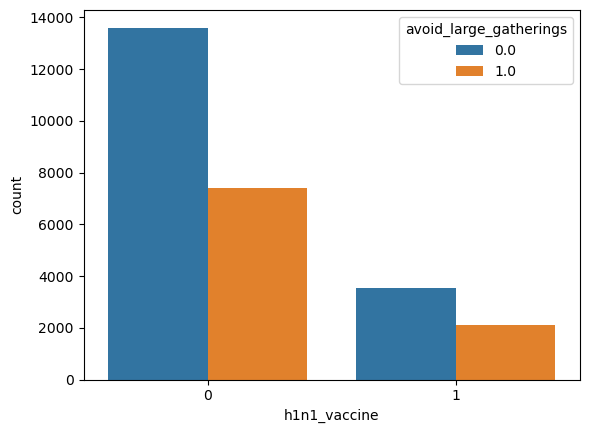

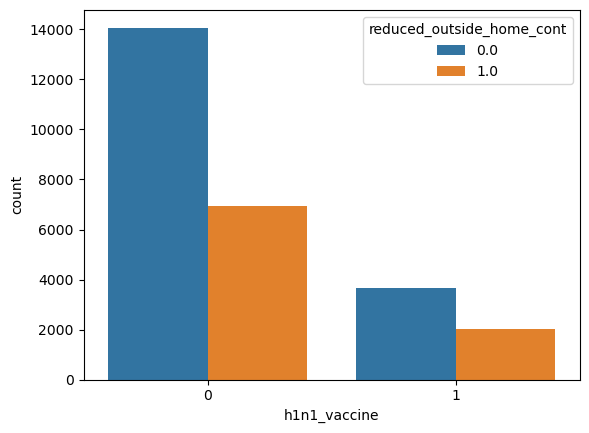

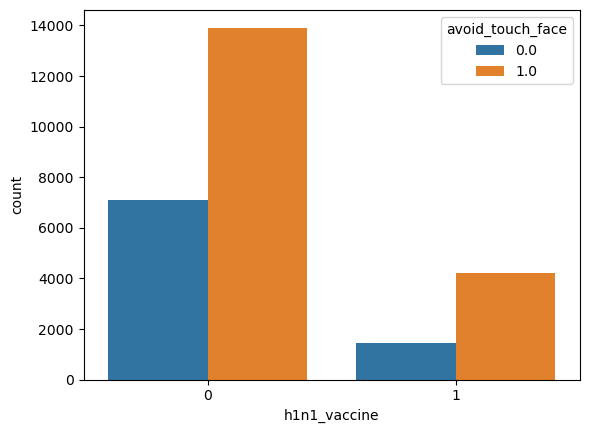

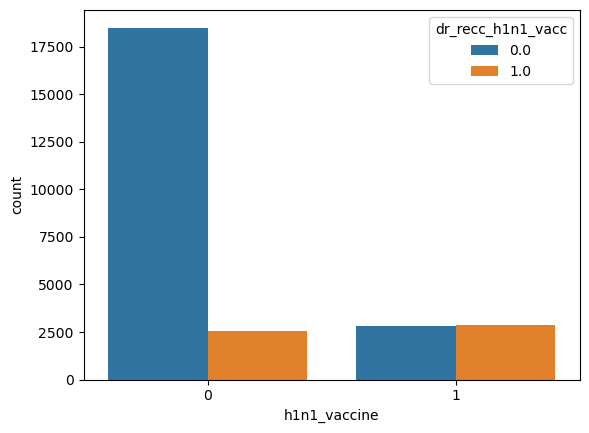

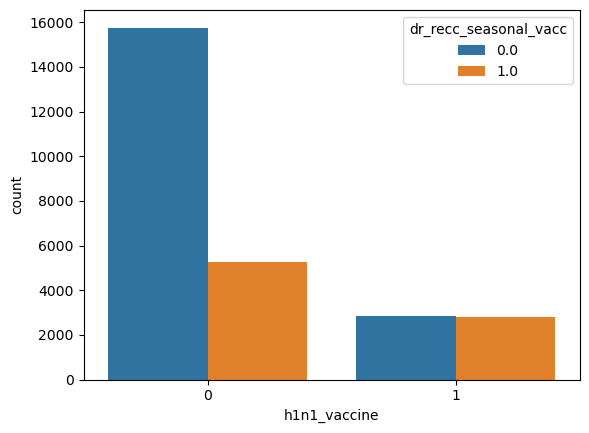

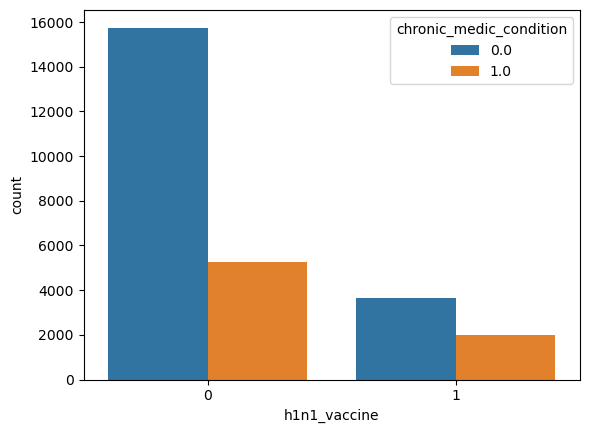

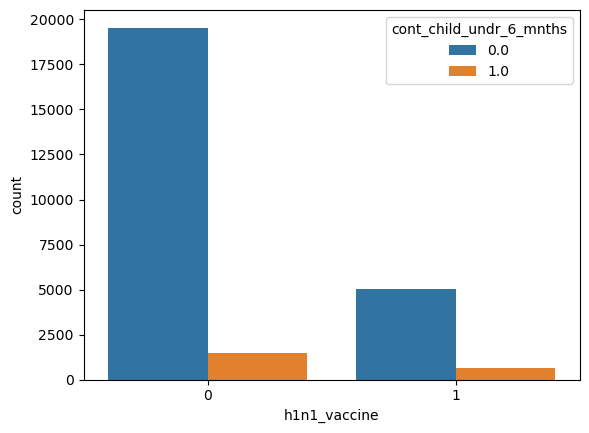

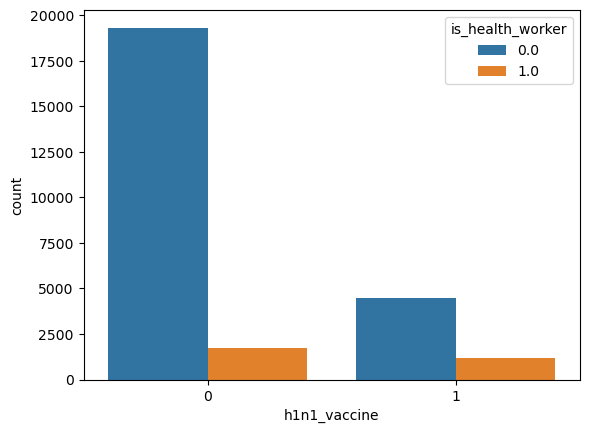

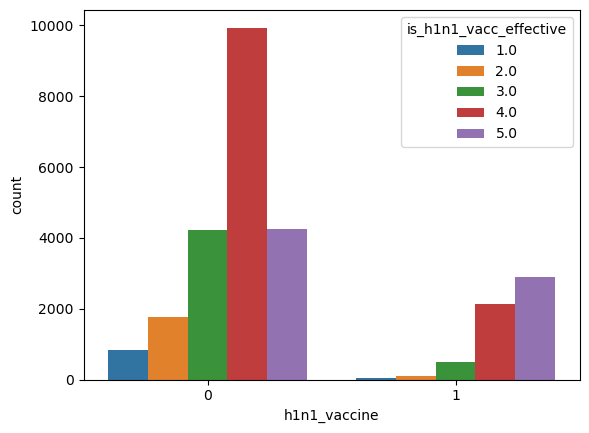

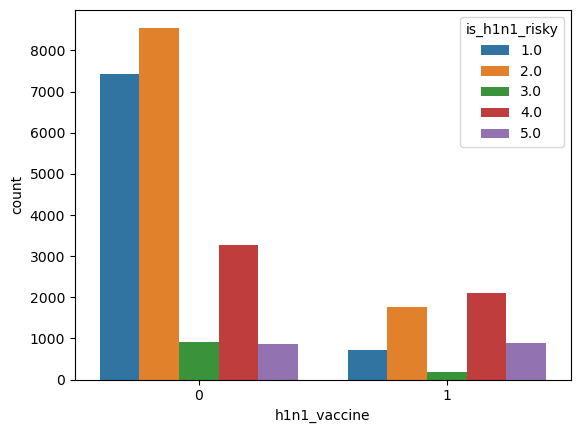

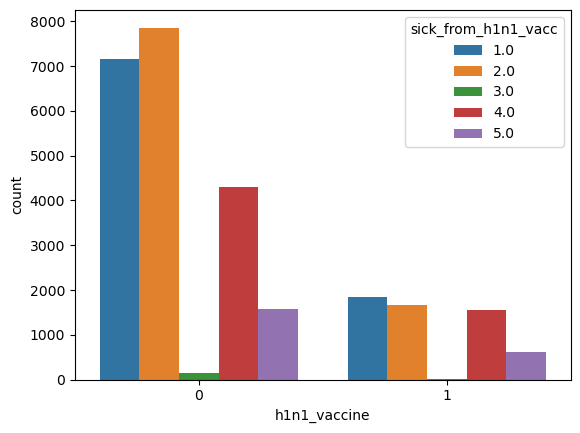

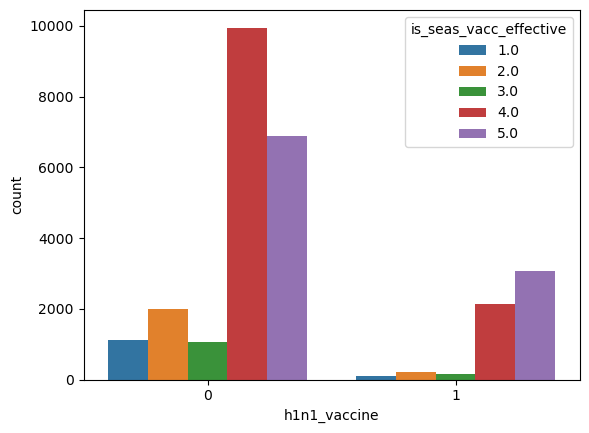

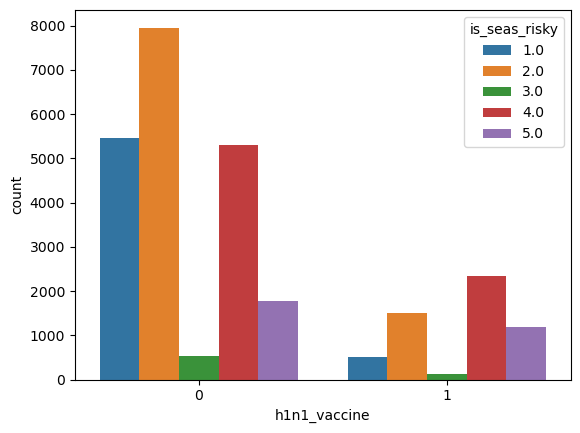

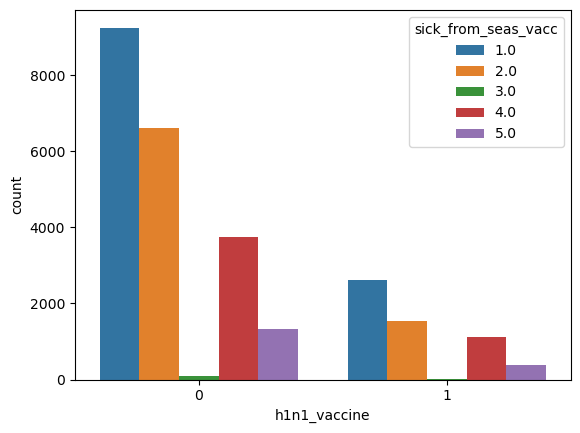

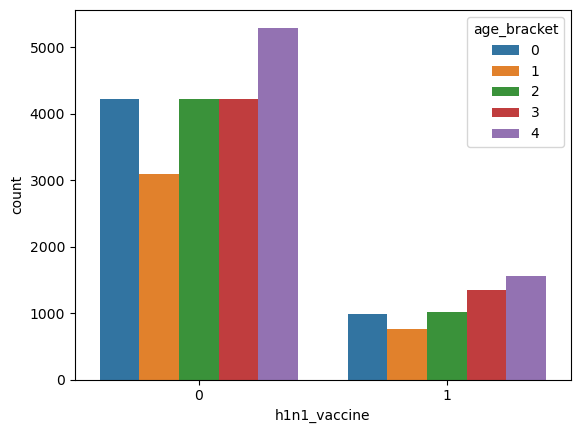

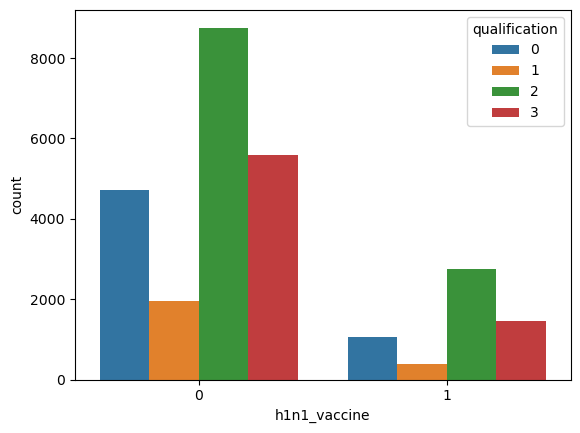

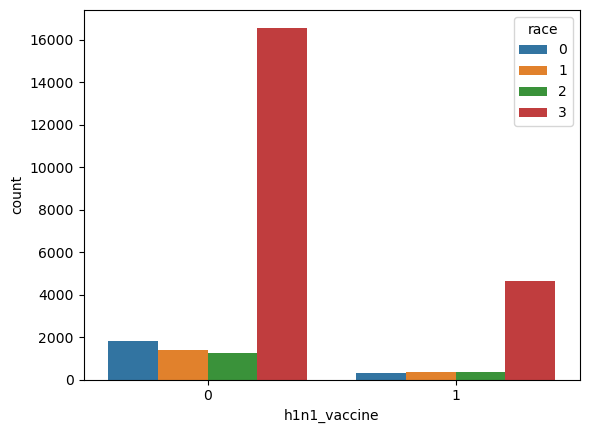

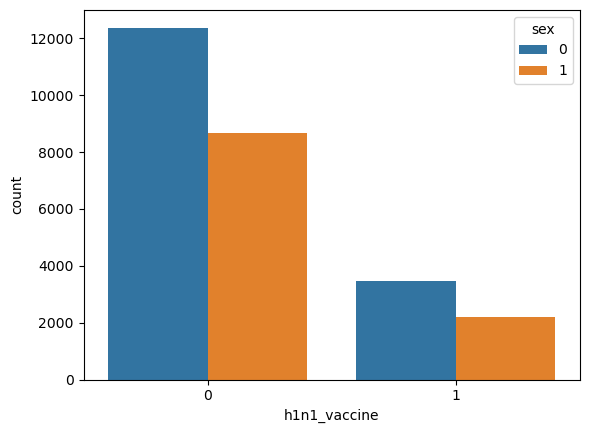

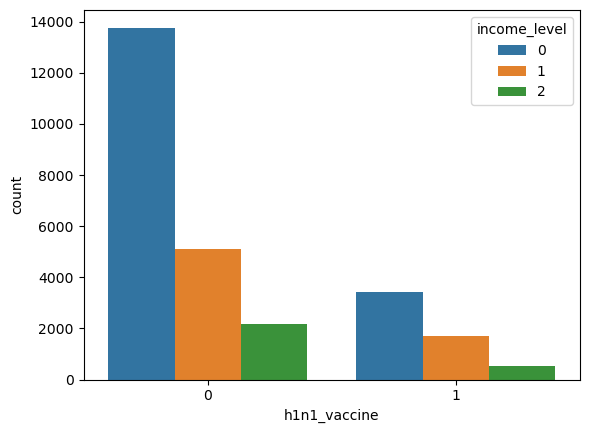

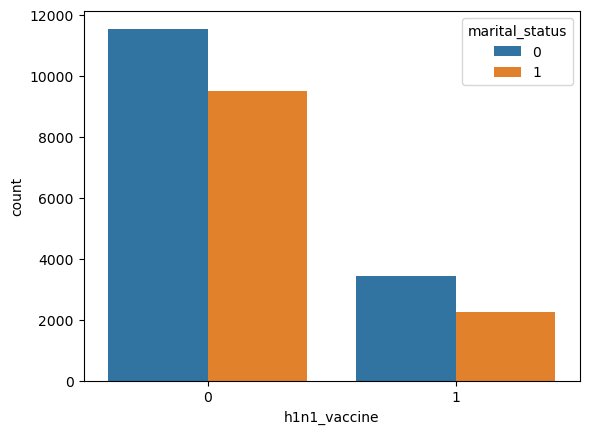

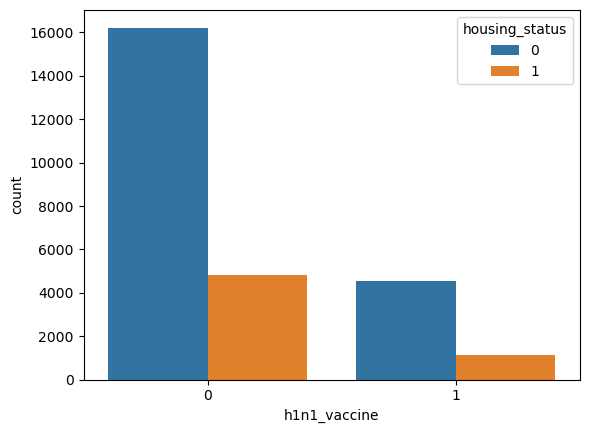

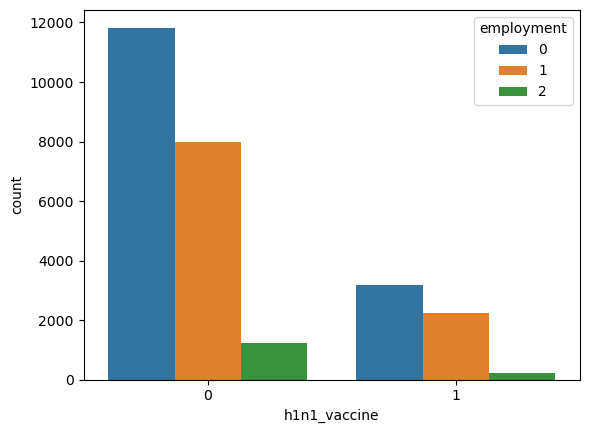

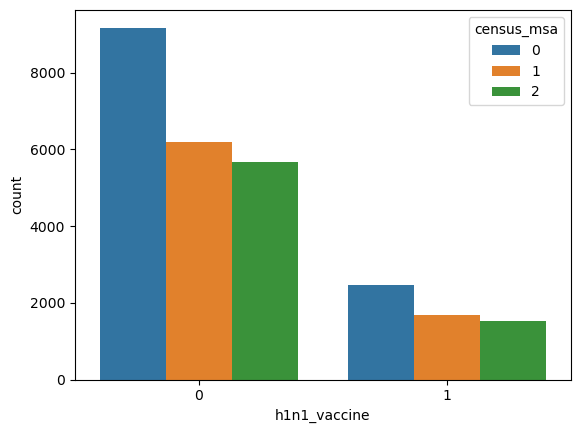

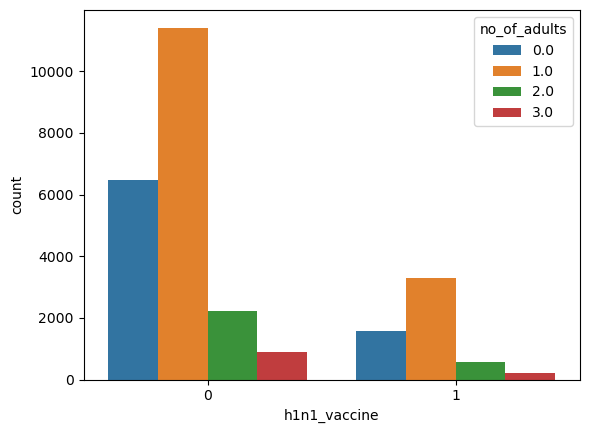

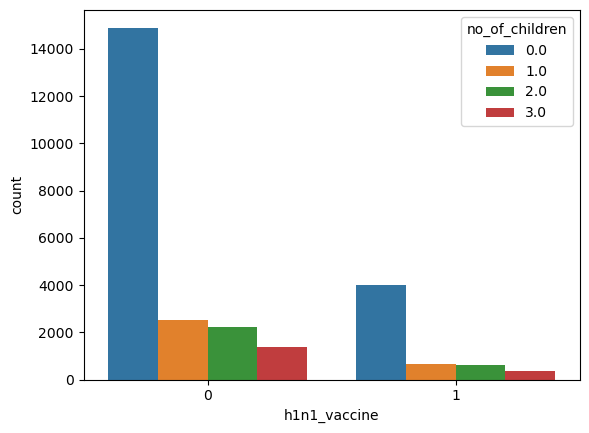

In [ ]:
cols = sdf3.columns
for i in cols[:-1]:
    sns.countplot(data = sdf3,x = cols[-1],hue = i)
    plt.show()

##### Splitting data for sdf2

In [ ]:
x = sdf2.drop('h1n1_vaccine',axis=1)
y = sdf2['h1n1_vaccine']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=1)

##### Fitting into models

In [ ]:
model_1 = LogisticRegression()
model_1.fit(x_train,y_train)

LogisticRegression()

In [ ]:
model_1.score(x_train,y_train)

0.8324241763037312

In [ ]:
model_1.score(x_test,y_test)

0.8297980655014424

In [ ]:
model_2 = DecisionTreeClassifier(criterion='gini',max_depth=5) # max_depth=5 is optimum
model_2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
model_2.score(x_train,y_train)

0.8280602225616408

In [ ]:
model_2.score(x_test,y_test)

0.8238588155438656

In [ ]:
model_3 = RandomForestClassifier(criterion='gini',max_depth=9)
model_3.fit(x_train,y_train)

RandomForestClassifier(max_depth=9)

In [ ]:
model_3.score(x_train,y_train)

0.866972143428613

In [ ]:
model_3.score(x_test,y_test)

0.8274223655184116

In [ ]:
model_4 = AdaBoostClassifier(n_estimators=30)
model_4.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=30)

In [ ]:
model_4.score(x_train,y_train)

0.8328605716779403

In [ ]:
model_4.score(x_test,y_test)

0.825046665535381

In [ ]:
model_5 = GradientBoostingClassifier(n_estimators=130)
model_5.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=130)

In [ ]:
model_5.score(x_train,y_train)

0.8429703978471161

In [ ]:
model_5.score(x_test,y_test)

0.830137451213304

In [ ]:
model_6 = SVC()
model_6.fit(x_train,y_train)

SVC()

In [ ]:
model_6.score(x_train,y_train)

0.8350425485489854

In [ ]:
model_6.score(x_test,y_test)

0.827931444086204

### Fitting results for sdf2(null values removed)
#### Logistic Regression : Train(83%) Test(82%)
#### Decision Tree : Train(82%) Test(82%)
#### Random Forest : Train(86%) Test(82%)
#### Ada Boost : Train(83%) Test(82%)
#### Gradient Boosting : Train(84%) Test(83%)
#### SVC : Train(83%) Test(82%)

##### Splitting data for sdf3

In [ ]:
x = sdf3.drop('h1n1_vaccine',axis=1)
y = sdf3['h1n1_vaccine']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=1)

##### Fitting into models

In [ ]:
model_1r = LogisticRegression()
model_1r.fit(x_train,y_train)

LogisticRegression()

In [ ]:
model_1r.score(x_train,y_train)

0.8332085161014229

In [ ]:
model_1r.score(x_test,y_test)

0.841133158617247

In [ ]:
model_2r = DecisionTreeClassifier(criterion='gini',max_depth=6) # max_depth=6 is optimum
model_2r.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [ ]:
model_2r.score(x_train,y_train)

0.8333689953995934

In [ ]:
model_2r.score(x_test,y_test)

0.8395107949581929

In [ ]:
model_3r = RandomForestClassifier(criterion='gini',max_depth=10) #max_depth=10 is optimal
model_3r.fit(x_train,y_train)

RandomForestClassifier(max_depth=10)

In [ ]:
model_3r.score(x_train,y_train)

0.8728469027495454

In [ ]:
model_3r.score(x_test,y_test)

0.8407587670036191

In [ ]:
model_4r = AdaBoostClassifier(n_estimators=80)
model_4r.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=80)

In [ ]:
model_4r.score(x_train,y_train)

0.8331550230020327

In [ ]:
model_4r.score(x_test,y_test)

0.8416323474354175

In [ ]:
model_5r = GradientBoostingClassifier(n_estimators=270)
model_5r.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=270)

In [ ]:
model_5r.score(x_train,y_train)

0.8480261046325024

In [ ]:
model_5r.score(x_test,y_test)

0.84699862723075

In [ ]:
model_6r = SVC()
model_6r.fit(x_train,y_train)

SVC()

In [ ]:
model_6r.score(x_train,y_train)

0.8367925537605649

In [ ]:
model_6r.score(x_test,y_test)


0.8378884312991389

### Fitting results for sdf3(null values replaced by median and mode)
#### Logistic Regression : Train(83%) Test(84%)
#### Decision Tree : Train(83%) Test(83%)
#### Random Forest : Train(87%) Test(84%)
#### Ada Boost : Train(83%) Test(84%)
#### Gradient Boosting : Train(84%) Test(84%)
#### SVC : Train(83%) Test(83%)

### Hence, the best optimal results are shown in Gradient boosting Classifier when the null values were replaced by mode and median

Change for git practice
